# Decoding the News Sharing Mystery - Prediction Model for News Post Shares on Facebook -

By Erika Nagai (enagai@umass.edu) 
For "Machine Learning for Social Science" at the University of Massachusetts, Amherst


## (0) Overview
This analysis was done for in-class project for "Machine Learning for Social Science" at the University of Massachusetts, Amherst. This analysis aims to predict how many the news post by major publisher will be shared on Facebook using regression, Random Forest, and Deep Learning.

## (1) Goal and Motivation

I decided to predict the number of "share" of the news posts on Facebook because this analysis may reveal whether there are certain factors that make people interested in news on a particular topic and whether they try to spread that news to others. Many media outlets and companies are competing for physical and online space in order to gain people's "attention." If this analysis reveals what captures people's interest, it could be beneficial for individuals, companies, and organizations trying to convey a message to the public. 

The reason why I chose the number of "share" among other engagement actions is the importance and the proactiveness of the action "share". First, sharing posts is a more proactive engagement compared to clicking "like" or commenting. Second, in a time where people get information mostly from social network, the posts shared by someone you know or you follow is pretty much the only information you don't have control on in social media because most contents we see is posted by friends or publishers we chose to follow. 

Speaking of the model performance, I will use MSE (Mean Square Error). Even though it is ideal to be able to predict the number of share as exactly as possible, I find it more important to be able to interpret the results and find out what makes people share the news posts. 


In [56]:
# import packages
%pip install pandas
%pip install numpy
import pandas as pd
import numpy as np


Note: you may need to restart the kernel to use updated packages.


## (2) Understand data

### Read in data
I obtained "Internet news data with readers engagement" dataset on Kaggle (https://www.kaggle.com/datasets/szymonjanowski/internet-articles-data-with-users-engagement).

This dataset comprises news posts published by 13 prominent publishers on Facebook between March 2019 and April 2019, with each row representing a post and containing information on the date, author, and publisher of the news, as well as the content details and the number of readers' engagements on Facebook.

In [57]:
# Read in data
df = pd.read_csv("articles_data.csv")
df

,Unnamed: 0,source_id,source_name,author,title,description,url,url_to_image,published_at,content,top_article,engagement_reaction_count,engagement_comment_count,engagement_share_count,engagement_comment_plugin_count
0,0,reuters,Reuters,Reuters Editorial,NTSB says Autopilot engaged in 2018 California...,The National Transportation Safety Board said ...,https://www.reuters.com/article/us-tesla-crash...,https://s4.reutersmedia.net/resources/r/?m=02&...,2019-09-03T16:22:20Z,WASHINGTON (Reuters) - The National Transporta...,0.0,0.0,0.0,2528.0,0.0
1,1,the-irish-times,The Irish Times,Eoin Burke-Kennedy,Unemployment falls to post-crash low of 5.2%,Latest monthly figures reflect continued growt...,https://www.irishtimes.com/business/economy/un...,https://www.irishtimes.com/image-creator/?id=1...,2019-09-03T10:32:28Z,The States jobless rate fell to 5.2 per cent l...,0.0,6.0,10.0,2.0,0.0
2,2,the-irish-times,The Irish Times,Deirdre McQuillan,"Louise Kennedy AW2019: Long coats, sparkling t...",Autumn-winter collection features designer’s g...,https://www.irishtimes.com/\t\t\t\t\t\t\t/life...,https://www.irishtimes.com/image-creator/?id=1...,2019-09-03T14:40:00Z,Louise Kennedy is showing off her autumn-winte...,1.0,NaN,NaN,NaN,NaN
3,3,al-jazeera-english,Al Jazeera English,Al Jazeera,North Korean footballer Han joins Italian gian...,Han is the first North Korean player in the Se...,https://www.aljazeera.com/news/2019/09/north-k...,https://www.aljazeera.com/mritems/Images/2019/...,2019-09-03T17:25:39Z,"Han Kwang Song, the first North Korean footbal...",0.0,0.0,0.0,7.0,0.0
4,4,bbc-news,BBC News,BBC News,UK government lawyer says proroguing parliamen...,"The UK government's lawyer, David Johnston arg...",https://www.bbc.co.uk/news/av/uk-scotland-4956...,https://ichef.bbci.co.uk/news/1024/branded_new...,2019-09-03T14:39:21Z,NaN,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10432,10432,abc-news,ABC News,The Associated Press,Drop in US service sector activity raises econ...,"Get breaking national and world news, broadcas...",https://abcnews.go.com/Business/wireStory/drop...,https://s.abcnews.com/images/US/WireAP_eb147c9...,2019-10-03T16:30:16Z,Growth in the U.S. economys vast services sect...,0.0,0.0,0.0,0.0,0.0
10433,10433,reuters,Reuters,Sumeet Chatterjee,Banker defections pose challenge for Credit Su...,The announcement by Julius Baer this week that...,https://www.reuters.com/article/us-credit-suis...,https://s3.reutersmedia.net/resources/r/?m=02&...,2019-10-03T15:59:52Z,ZURICH/HONG KONG (Reuters) - The announcement ...,0.0,0.0,0.0,627.0,0.0
10434,10434,cnn,CNN,"Lauren M. Johnson, CNN","A 5-year-old cancer survivor donates 3,000 toy...",Weston Newswanger is just a normal 5-year-old ...,https://www.cnn.com/2019/10/03/us/five-year-ol...,https://cdn.cnn.com/cnnnext/dam/assets/1910021...,2019-10-03T11:20:06Z,NaN,0.0,4072.0,179.0,466.0,0.0
10435,10435,cbs-news,CBS News,CBS News,Fateful Connection,A detective is haunted by the case of two wome...,https://www.cbsnews.com/video/fateful-connecti...,https://cbsnews1.cbsistatic.com/hub/i/r/2019/1...,2019-10-03T16:40:03Z,NaN,0.0,0.0,0.0,0.0,0.0


### Skim data
This data consists of 10437 rows and 15 columns.


In [58]:
# Data type 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10437 entries, 0 to 10436
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Unnamed: 0                       10437 non-null  int64  
 1   source_id                        10437 non-null  object 
 2   source_name                      10437 non-null  object 
 3   author                           9417 non-null   object 
 4   title                            10435 non-null  object 
 5   description                      10413 non-null  object 
 6   url                              10436 non-null  object 
 7   url_to_image                     9781 non-null   object 
 8   published_at                     10436 non-null  object 
 9   content                          9145 non-null   object 
 10  top_article                      10435 non-null  float64
 11  engagement_reaction_count        10319 non-null  float64
 12  engagement_comment

There are rows that have NA values in their columns. 
"Title" is definitely something that I want to analyze so I removed the rows with NA title.
Besides, since I want to predict the number of engagement by readers I removed the rows whose engagement information is NA as well.


In [59]:
# Missing values

na_count = df.isna().sum()
na_percent = round(df.isna().mean() * 100, 2)

# Create a new dataframe with the results
result_df = pd.DataFrame({'NA Count': na_count, '% NA Values': na_percent})

print(result_df)

                                 NA Count  % NA Values
Unnamed: 0                              0         0.00
source_id                               0         0.00
source_name                             0         0.00
author                               1020         9.77
title                                   2         0.02
description                            24         0.23
url                                     1         0.01
url_to_image                          656         6.29
published_at                            1         0.01
content                              1292        12.38
top_article                             2         0.02
engagement_reaction_count             118         1.13
engagement_comment_count              118         1.13
engagement_share_count                118         1.13
engagement_comment_plugin_count       118         1.13


In [60]:
# Remove the rows with NA values in their "title", "engagement_reaction_count", "engagement_comment_count", "engagement_share_count", "engagement_comment_plugin_count"
df = df.dropna(subset=['title', 'engagement_reaction_count', 'engagement_comment_count', 'engagement_share_count', 'engagement_comment_plugin_count'])

# Remove unnecessary column "Unnamed: 0"
df = df.drop(['Unnamed: 0'], axis = 1)


In [61]:
# Understand quantitative characteristic of the data

df.describe()

,top_article,engagement_reaction_count,engagement_comment_count,engagement_share_count,engagement_comment_plugin_count
count,10317.000000,10317.000000,10317.000000,10317.000000,10317.000000
mean,0.112145,381.416788,124.006591,196.236309,0.011631
std,0.315560,4433.772657,965.436117,1020.775517,0.268301
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.000000,1.000000,0.000000,8.000000,0.000000
75%,0.000000,43.000000,12.000000,47.000000,0.000000
max,1.000000,354132.000000,48490.000000,39422.000000,15.000000


This dataset gathers the news posts on Facebook by 13 unique publishers.
There seem to be duplicated title and description.

In [62]:
# Understand qualitative characteristic of the data

df.describe(include='O')

,source_id,source_name,author,title,description,url,url_to_image,published_at,content
count,10317,10317,9299,10317,10293,10317,9662,10317,9026
unique,12,12,2569,9779,9137,10314,8337,9421,8342
top,reuters,Reuters,The Associated Press,Quickly catch up on the day's news,"Get breaking national and world news, broadcas...",https://www.cbsnews.com/video/lil-nas-x-on-his...,https://s4.reutersmedia.net/resources_v2/image...,2019-09-07T05:00:00Z,Chat with us in Facebook Messenger. Find out w...
freq,1252,1252,975,6,408,2,379,23,125


In [63]:
# There are 6 rows with the same title "Quickly catch up on the..."
# These rows didn't capture well what the news was about so I remove them

df = df[~df['title'].str.startswith("Quickly catch up on the")]


There are 994 rows with duplicated title values.

In [64]:
df[df.duplicated(subset=['title'], keep=False)].sort_values('title').head(40)


,source_id,source_name,author,title,description,url,url_to_image,published_at,content,top_article,engagement_reaction_count,engagement_comment_count,engagement_share_count,engagement_comment_plugin_count
8749,cbs-news,CBS News,CBS News,"""Don't Scream""",A young mom calls 911 claiming she cut her own...,https://www.cbsnews.com/video/dont-scream-3/,https://cbsnews2.cbsistatic.com/hub/i/r/2018/0...,2019-10-01T00:38:56Z,NaN,0.0,0.0,0.0,0.0,0.0
908,cbs-news,CBS News,CBS News,"""Don't Scream""",A young mom calls 911 claiming she cut her own...,https://www.cbsnews.com/video/dont-scream-1/,https://cbsnews2.cbsistatic.com/hub/i/r/2018/1...,2019-09-05T00:21:00Z,NaN,0.0,0.0,0.0,0.0,0.0
4626,al-jazeera-english,Al Jazeera English,NaN,'Astonishing': Taliban respond to Trump's peac...,NaN,http://www.aljazeera.com/programmes/talktojaze...,NaN,2019-09-12T14:52:07.0313135Z,NaN,1.0,0.0,0.0,0.0,0.0
4770,al-jazeera-english,Al Jazeera English,NaN,'Astonishing': Taliban respond to Trump's peac...,Spokesperson tells Al Jazeera that without an ...,https://www.aljazeera.com/programmes/talktojaz...,NaN,2019-09-12T14:14:18Z,NaN,0.0,10.0,1.0,64.0,0.0
3975,al-jazeera-english,Al Jazeera English,Al Jazeera,"'Electric shocks, beatings': Kashmiris allege ...",Kashmiris accuse forces of resorting to violen...,http://www.aljazeera.com/news/2019/09/shocks-b...,https://www.aljazeera.com/mritems/Images/2019/...,2019-09-10T12:29:00Z,The Indian soldiers descended on Bashir Ahmed ...,1.0,0.0,0.0,0.0,0.0
3964,al-jazeera-english,Al Jazeera English,Al Jazeera,"'Electric shocks, beatings': Kashmiris allege ...",Kashmiris accuse forces of resorting to violen...,https://www.aljazeera.com/news/2019/09/shocks-...,https://www.aljazeera.com/mritems/Images/2019/...,2019-09-10T12:28:16Z,The Indian soldiers descended on Bashir Ahmed ...,0.0,3893.0,1084.0,1957.0,0.0
6131,reuters,Reuters,Nichola Saminather,'Jojo Rabbit' wins Toronto film festival's Osc...,"New Zealander Taika Waititi's ""Jojo Rabbit"" on...",https://ca.reuters.com/article/entertainmentNe...,https://s3.reutersmedia.net/resources/r/?m=02&...,2019-09-15T18:27:15Z,TORONTO (Reuters) - New Zealander Taika Waitit...,0.0,0.0,0.0,0.0,0.0
6104,reuters,Reuters,Nichola Saminather,'Jojo Rabbit' wins Toronto film festival's Osc...,"New Zealander Taika Waititi's ""Jojo Rabbit"" on...",https://www.reuters.com/article/us-filmfestiva...,https://s4.reutersmedia.net/resources/r/?m=02&...,2019-09-15T18:27:15Z,TORONTO (Reuters) - New Zealander Taika Waitit...,0.0,0.0,0.0,0.0,0.0
9151,al-jazeera-english,Al Jazeera English,Tessa Fox,'My best friend': Khashoggi fiance pays tribut...,"Hatice Cengiz, friends, Agnes Callamard and Je...",https://www.aljazeera.com/news/2019/10/friend-...,https://www.aljazeera.com/mritems/Images/2019/...,2019-10-02T15:35:20Z,"Istanbul, Turkey - At 1:14pm, a minute of sile...",0.0,4.0,0.0,29.0,0.0
9508,al-jazeera-english,Al Jazeera English,Tessa Fox,'My best friend': Khashoggi fiance pays tribut...,"Hatice Cengiz, friends, Agnes Callamard and Je...",http://www.aljazeera.com/news/2019/10/friend-k...,https://www.aljazeera.com/mritems/Images/2019/...,2019-10-02T15:30:00Z,"Istanbul, Turkey - At 1.14pm, a minute of sile...",1.0,0.0,0.0,0.0,0.0


I decided to drop the duplicates with fewer number of engagement.

In [65]:
df['engagement_total'] = df['engagement_reaction_count'] + df['engagement_comment_count'] + df['engagement_share_count'] + df['engagement_comment_plugin_count']
df = df.sort_values('engagement_total', ascending=False).drop_duplicates('title', keep = 'first')

### Feature Engineering (`published_at`)



In [66]:
#"published_at" should be date type. Besides, "day", "time" information would be useful.

df['published_at'] = pd.to_datetime(df['published_at'])
df['day_published_at'] = df['published_at'].dt.day_name()
df['hour_published_at'] = df['published_at'].dt.hour

#set an order 
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['day_published_at'] = pd.Categorical(df['day_published_at'], categories=days, ordered=True)





In [67]:
df = df.sort_values('day_published_at')

# Exploratory Analysis of data

*Who writes the news?* 

As known, this dataset contains the news posts information by 13 major publishers. 
It has more than 2000 the posts by Reuters.

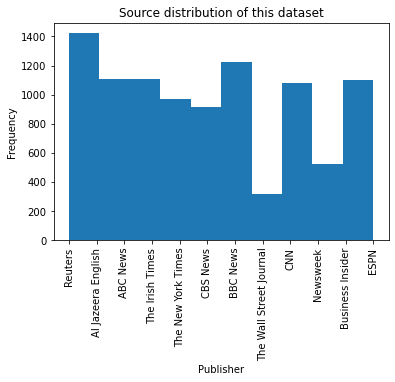

In [68]:
# Who writes the news?

import matplotlib.pyplot as plt

plt.hist(df['source_name'])
plt.title('Source distribution of this dataset')
plt.xlabel('Publisher')
plt.ylabel('Frequency')
plt.xticks(rotation=90)

plt.show()

*When is the news published?*  

According to this dataset, news is most frequently posted on Thursdays, followed by Tuesdays. 
News was posted from midnight (12:00 am) to 6:00 pm (18:00). There were fewer posts until around 8:00 am in the morning, and the number of posts increased around 5:00 pm in the evening, which was the peak posting time.

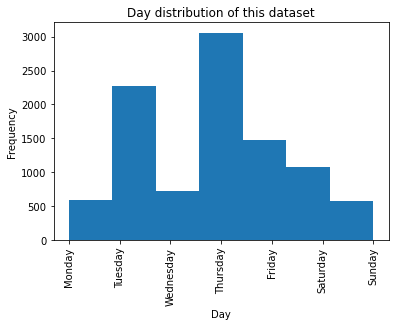

In [69]:
# When do we people publish news?

plt.hist(df['day_published_at'], bins=7)
plt.title('Day distribution of this dataset')
plt.xlabel('Day')
plt.ylabel('Frequency')
plt.xticks(rotation=90)

plt.show()



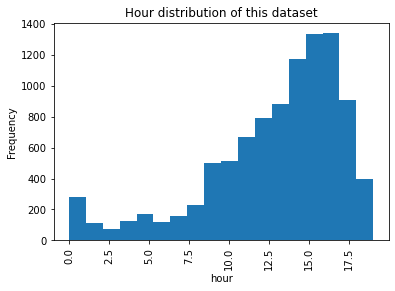

In [70]:
# When do we people publish news?

plt.hist(df['hour_published_at'], bins=18)
plt.title('Hour distribution of this dataset')
plt.xlabel('hour')
plt.ylabel('Frequency')
plt.xticks(rotation=90)

plt.show()

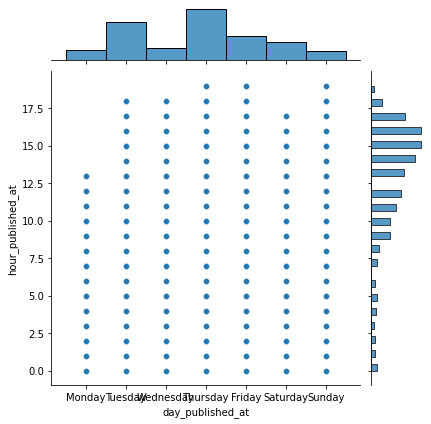

In [71]:
import seaborn as sns

sns.jointplot(x=df['day_published_at'], y=df['hour_published_at'], kind='scatter')
#sns.jointplot(x=df['day_published_at'], y=df['hour_published_at'], kind='hex')
plt.show()

*How does the published time matter to the engagement?*


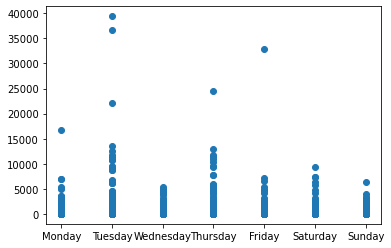

In [72]:
plt.scatter(df['day_published_at'], df['engagement_share_count'])
plt.show()

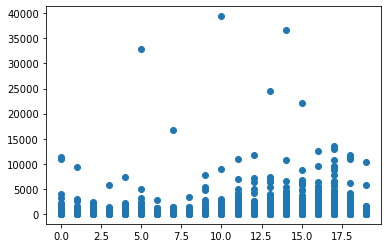

In [73]:
plt.scatter(df['hour_published_at'], df['engagement_share_count'])
plt.show()

*What is talked about?* 

In [74]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk

# Download the required NLTK corpora if not already downloaded
nltk.download('stopwords')

# Combine all titles into a single string
text = ' '.join(df['title'].astype(str).tolist())

# Tokenize the text into individual words
words = nltk.tokenize.word_tokenize(text)

# Filter out stop words (common words like "the", "a", "and", etc.)
stop_words = set(nltk.corpus.stopwords.words('english'))

filtered_words = [word.lower() for word in words if word.lower() not in stop_words]

# Count the frequency of each word
word_freq = nltk.FreqDist(filtered_words)

# Print the top 100 words by frequency
for word, frequency in word_freq.most_common(100):
    print(word, frequency)
    
    
    

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Microsoft\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


, 2224
: 2151
's 1518
' 1272
’ 941
trump 600
new 558
. 491
says 488
‘ 366
us 348
? 337
- 332
$ 332
u.s. 257
brexit 254
world 237
( 220
) 220
dorian 217
man 214
`` 203
'' 203
hurricane 180
n't 174
johnson 174
police 165
could 162
— 160
china 153
first 152
one 143
house 134
ireland 133
deal 127
wall 126
uk 125
street 123
2020 121
2019 121
hong 120
kong 119
million 119
saudi 117
killed 114
cup 112
talks 112
death 112
like 110
latest 109
former 109
court 106
people 104
get 103
woman 103
back 102
years 102
trade 101
dies 101
live 101
york 101
president 99
day 98
plan 98
review 97
watch 96
bahamas 96
say 96
oil 95
boris 95
week 95
war 93
best 93
north 93
time 93
& 92
iran 92
fire 91
may 90
gmt 90
election 90
video 90
apple 90
california 88
women 88
news 87
times 87
big 87
take 86
impeachment 86
ukraine 85
government 85
win 85
climate 84
irish 84
business 83
attack 82
eu 81
chief 81
russia 81


**What countries are they talked about?** 
There are several countries that are used many times. (u.s., china, ireland, uk, hong kong, saudi, bahamas, iran, ukraine, russia)
I made new columns of these countries name where 1 means the title contains the country.

The country mentioned in the post may affect the number of share, but not significantly, thus I decided not to take this factor into account.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


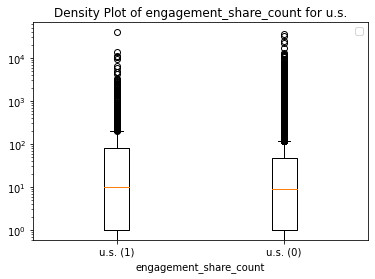

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


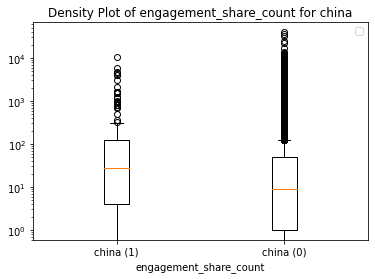

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


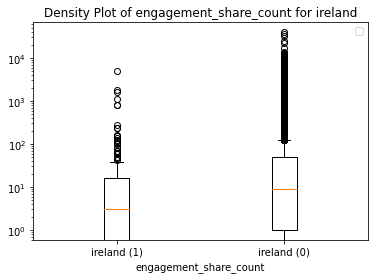

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


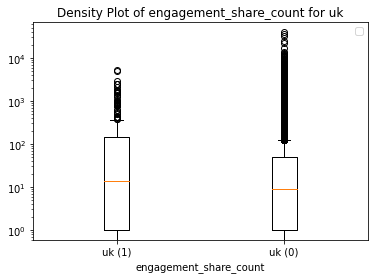

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


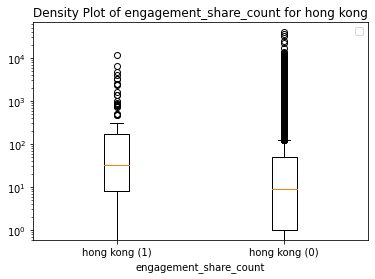

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


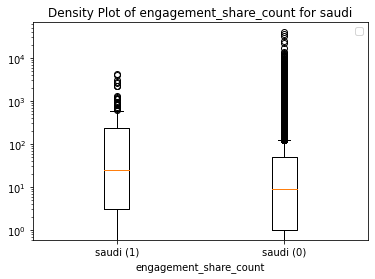

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


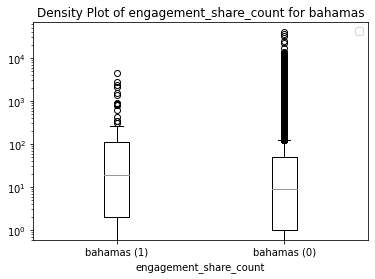

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


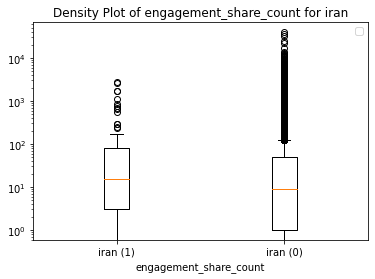

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


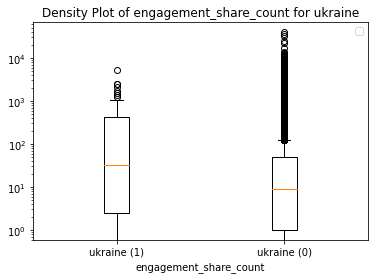

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


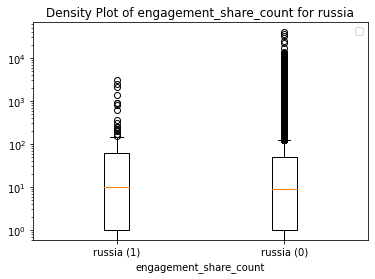

In [75]:
# Make new columns (u.s., china, ireland, uk, hong kong, saudi, bahamas, iran, ukraine, russia)

df['u.s.'] = df['title'].str.contains('u.s.', case=False)
df['china'] = df['title'].str.contains('china', case=False)
df['ireland'] = df['title'].str.contains('ireland', case=False)
df['uk'] = df['title'].str.contains('uk', case=False)
df['hong kong'] = df['title'].str.contains('hong kong', case=False)
df['saudi'] = df['title'].str.contains('saudi', case=False)
df['bahamas'] = df['title'].str.contains('bahamas', case=False)
df['iran'] = df['title'].str.contains('iran', case=False)
df['ukraine'] = df['title'].str.contains('ukraine', case=False)
df['russia'] = df['title'].str.contains('russia', case=False)

# Check the distribution of number of share depending on if the title mentions the country or not 
# Make a distribution graph of each country and fill red if the title mentions the country and blue if not


countries = ['u.s.', 'china', 'ireland', 'uk', 'hong kong', 'saudi', 'bahamas', 'iran', 'ukraine', 'russia']
colors = {0: 'grey', 1: 'red'}

# Create separate density plots for each country
for country in countries:
    # Create a new figure and axis for each country
    fig, ax = plt.subplots()

    # Filter the data based on the country and value
    country_data_1 = df[df[country] == 1]['engagement_share_count']
    country_data_0 = df[df[country] == 0]['engagement_share_count']

    # Create density plots for values of 1 and 0
    # sns.kdeplot(data=country_data_1, color=colors[1], alpha=0.5, label=f'{country} (1)')
    # sns.kdeplot(data=country_data_0, color=colors[0], alpha=0.5, label=f'{country} (0)')

    plt.boxplot([country_data_1, country_data_0], labels=[f'{country} (1)', f'{country} (0)'])
    plt.yscale('log', base = 10)
    
    # Set labels and title for each country
    ax.set_xlabel('engagement_share_count')
    ax.set_title(f'Density Plot of engagement_share_count for {country}')
    

    # Show legend for each country
    ax.legend()

    # Show the plot for each country
    plt.show()



*How much engagement do news usually get?*

The count of engagement actions vary quite a lot depending on the post except comment plugin count.
The count of comment, reaction, and share can reach over 10^4, however, most (more than 75%) of the posts have less than 50.


In [76]:
df[['engagement_comment_count', 'engagement_comment_plugin_count','engagement_reaction_count','engagement_share_count']].describe()

,engagement_comment_count,engagement_comment_plugin_count,engagement_reaction_count,engagement_share_count
count,9778.000000,9778.000000,9778.000000,9778.000000
mean,130.263755,0.012272,401.472489,201.421968
std,990.943123,0.275584,4553.333398,1045.456402
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,2.000000,9.000000
75%,14.000000,0.000000,49.000000,51.000000
max,48490.000000,15.000000,354132.000000,39422.000000


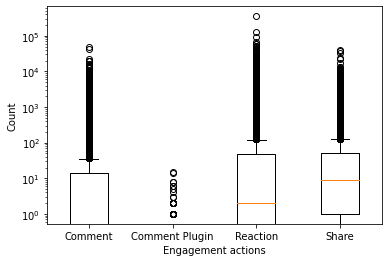

In [77]:
#plt.boxplot(df['engagement_comment_count'], df['engagement_comment_plugin_count'], df['engagement_reaction_count'], df['engagement_share_count'])
# concatenate the different series into a list of values
data = [df['engagement_comment_count'], df['engagement_comment_plugin_count'], df['engagement_reaction_count'], df['engagement_share_count']]

# plot the boxplot using the list of values
plt.boxplot(data)
plt.yscale('log', base = 10)
plt.xticks([1,2,3,4],['Comment','Comment Plugin','Reaction','Share'])
plt.xlabel('Engagement actions')
plt.ylabel('Count')

plt.show()

*What variables matter to engagement?*


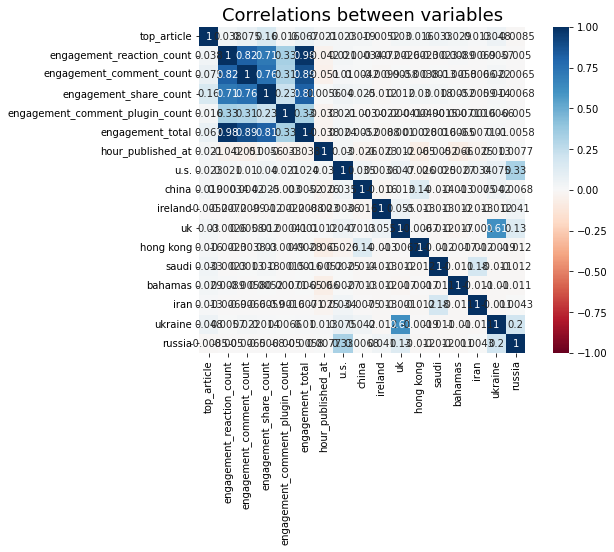

In [78]:
# Checking correlation

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, square=True, cmap='RdBu', vmax=1, vmin=-1)
plt.title('Correlations between variables', size = 18);
plt.show()

In [79]:
# Relation between categorical variables

# sns.pairplot(df)

# Preparation for model fitting

I want to add a few new variables that can matter to the number of engagement actions, which are (1) the number of followers of publishers on Facebook, (2) the tone and emotion of news title (3) the tone and emotion of news description

*(2) The tone and emotion of news title* 

Emotionally engaging title can attract more readers.
I used "text2emotion" package to detect the "angry", "fear", "happy", "sad", "surprise" emotion of the news title.

In [80]:
#%pip uninstall emoji
#%pip install emoji==1.7.0
import emoji

In [81]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Microsoft\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [82]:
# %pip install text2emotion

from text2emotion import get_emotion

# # apply the get_emotion function to each row of the dataframe
# df[['t_angry', 't_fear', 't_happy', 't_sad', 't_surprise']] = df['title'].apply(lambda x: pd.Series(get_emotion(x)))

# # print the updated dataframe
# print(df)


In [83]:
# df.to_csv('df_with_emotion.csv', index=False)
# get_emotion function takes long so I saved the result in csv

*(3)the tone and emotion of news description*

Do the same 

In [84]:
print(df['description'].head())

3179    Tunisia's presidential election on Sept. 15 ha...
3091    Residents in Mumbai's crumbling buildings fear...
3371    A former U.S. soldier has been imprisoned for ...
3638    Dublin Fringe Festival: The former assistant a...
3592    A plane has left Zimbabwe for Singapore carryi...
Name: description, dtype: object


In [85]:

# df['description_lower'] = df['description'].str.lower().fillna('NA')
# # apply the get_emotion() function to the 'description' column
# df[['d_angry', 'd_fear', 'd_happy', 'd_sad', 'd_surprise']] = df['description_lower'].apply(lambda x: pd.Series(get_emotion(x)))



In [86]:
#df.head(30)

In [87]:
#df.to_csv('df_with_emotion.csv', index=False)

In [88]:
df = pd.read_csv('df_with_emotion.csv')

*(1) The number of followers of publishers on Facebook* 

It would be ideal to use the number of followers of each publisher as of September 2019, however there is no way doing that so I decided to use the number of followers as of today (May 3rd, 2023).


In [89]:
df['source_name'].unique()

array(['Business Insider', 'CNN', 'Reuters', 'The Wall Street Journal',
       'BBC News', 'ABC News', 'Al Jazeera English', 'Newsweek',
       'The New York Times', 'The Irish Times', 'CBS News', 'ESPN'],
      dtype=object)

In [90]:
# Adding the number of Facebook followers of each publisher

followers = pd.DataFrame(
    {'source_name': ['Business Insider', 'CNN', 'Reuters', 'The Wall Street Journal',
       'BBC News', 'ABC News', 'Al Jazeera English', 'Newsweek',
       'The New York Times', 'The Irish Times', 'CBS News', 'ESPN'],
     'followers in ten thousand': [982.8,3477.1,689.0,724.2,6020.0,1774,1714,160,1932,67,747,2264],
     'link': ['https://www.facebook.com/businessinsider', 'https://www.facebook.com/cnn', 'https://www.facebook.com/Reuters', 'https://www.facebook.com/WSJ', 'https://www.facebook.com/bbcnews', 'https://www.facebook.com/ABCNews','https://www.facebook.com/aljazeera','https://www.facebook.com/Newsweek', 'https://www.facebook.com/nytimes', 'https://www.facebook.com/irishtimes','https://www.facebook.com/CBSNews', 'https://www.facebook.com/ESPN']}
)

followers

,source_name,followers in ten thousand,link
0,Business Insider,982.8,https://www.facebook.com/businessinsider
1,CNN,3477.1,https://www.facebook.com/cnn
2,Reuters,689.0,https://www.facebook.com/Reuters
3,The Wall Street Journal,724.2,https://www.facebook.com/WSJ
4,BBC News,6020.0,https://www.facebook.com/bbcnews
5,ABC News,1774.0,https://www.facebook.com/ABCNews
6,Al Jazeera English,1714.0,https://www.facebook.com/aljazeera
7,Newsweek,160.0,https://www.facebook.com/Newsweek
8,The New York Times,1932.0,https://www.facebook.com/nytimes
9,The Irish Times,67.0,https://www.facebook.com/irishtimes


In [91]:
# left join

df = pd.merge(df, followers, how = "left")

In [92]:
# Data processing 
# Dummy variables for a categorical column

dummies = pd.get_dummies(df['source_id']).astype(float)
df = pd.concat([df, dummies], axis=1)


dummies = pd.get_dummies(df['day_published_at']).astype(float)
df = pd.concat([df, dummies], axis=1)



# Modeling 

I will fit the following models and validate the performance with 5-fold cross validation.


(1) Simple linear regression
(2) Multiple linear regression
(3) Ridge regression
(4) Lasso
(5) Tree Decision
(6) Random Forest

I shoule mention that I will NOT use `engagement_reaction_count`, `engagement_comment_count`, `engagement_comment_plugin_count` in the model fitting because these pieces of information are not aavilable when posting the news, and using them in the model could lead to data leakage.

In [93]:
# import necessary packages

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import scale
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

from numpy import mean
from numpy import absolute
from numpy import sqrt


from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [94]:
df.columns

Index(['source_id', 'source_name', 'author', 'title', 'description', 'url',
       'url_to_image', 'published_at', 'content', 'top_article',
       'engagement_reaction_count', 'engagement_comment_count',
       'engagement_share_count', 'engagement_comment_plugin_count',
       'day_published_at', 'hour_published_at', 't_angry', 't_fear', 't_happy',
       't_sad', 't_surprise', 't_emotional', 'description_lower', 'd_angry',
       'd_fear', 'd_happy', 'd_sad', 'd_surprise', 'followers in ten thousand',
       'link', 'abc-news', 'al-jazeera-english', 'bbc-news',
       'business-insider', 'cbs-news', 'cnn', 'espn', 'newsweek', 'reuters',
       'the-irish-times', 'the-new-york-times', 'the-wall-street-journal',
       'Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday'],
      dtype='object')

In [95]:
# Split into dependent variables and independent variables
X = df[['top_article', 'hour_published_at', 't_angry', 't_fear', 't_happy', 't_sad', 't_surprise', 'd_angry', 'd_fear', 'd_happy', 'd_sad', 'd_surprise', 'followers in ten thousand', 'abc-news', 'al-jazeera-english', 'bbc-news',
       'business-insider', 'cbs-news', 'cnn', 'espn', 'newsweek', 'reuters',
       'the-irish-times', 'the-new-york-times', 'the-wall-street-journal', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']]
y = df['engagement_share_count']


cv = KFold(n_splits=5, random_state=1, shuffle=True)

# Prepare emply lists for saving the results
model_name = list()
model_performance = list()


y = df['engagement_share_count']


cv = KFold(n_splits=5, random_state=1, shuffle=True)

# Prepare emply lists for saving the results
model_name = list()
model_performance = list()



In [96]:
# Check shape
print(np.shape(X))
print(np.shape(y))

# type
print(X.dtypes)

# Missing values?
print(X.isnull().any(axis=0))
print(y.isnull().any(axis=0))

(10311, 32)
(10311,)
top_article                  float64
hour_published_at              int64
t_angry                      float64
t_fear                       float64
t_happy                      float64
t_sad                        float64
t_surprise                   float64
d_angry                      float64
d_fear                       float64
d_happy                      float64
d_sad                        float64
d_surprise                   float64
followers in ten thousand    float64
abc-news                     float64
al-jazeera-english           float64
bbc-news                     float64
business-insider             float64
cbs-news                     float64
cnn                          float64
espn                         float64
newsweek                     float64
reuters                      float64
the-irish-times              float64
the-new-york-times           float64
the-wall-street-journal      float64
Monday                       float64
Tuesday          

In [97]:
# Create a scaler to standardize the features in a dataset
scaler = StandardScaler().fit(X)
X = scaler.transform(X)


## Linear Regression

In [98]:
# Linear regression

import sklearn
from sklearn.model_selection import train_test_split



#build multiple linear regression model
name = 'Linear Regression'
linear = LinearRegression()

scores = cross_val_score(linear, X, y, scoring='neg_mean_squared_error', cv=cv)
print(f"The MSE of {name} is {-mean(scores)}")

# Save the results
model_name.append(name)
model_performance.append(-mean(scores))



The MSE of Linear Regression is 995935.1628933204


## Lasso and Ridge regression

In [99]:
# Hyperparameter tuning for ridge and lasso



# Define hyperparameters to be tuned
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

# Define the Lasso and Ridge Models
lasso_model = Lasso()
ridge_model = Ridge()

# Perform grid search cross-validation to find the optimal hyperparameters for Lasso
lasso_grid_search = GridSearchCV(lasso_model, param_grid, cv=cv, scoring='neg_mean_squared_error')
lasso_grid_search.fit(X, y)

# Perform grid search cross-validation to find the optimal hyperparameters for Ridge
ridge_grid_search = GridSearchCV(ridge_model, param_grid, cv=cv, scoring='neg_mean_squared_error')
ridge_grid_search.fit(X, y)

# Print the best hyperparameters for Lasso and Ridge
print('Lasso - Best Hyperparameters:', lasso_grid_search.best_params_)
print('Ridge - Best Hyperparameters:', ridge_grid_search.best_params_)

print("Best RMSLE(Lasso): ", -ridge_grid_search.best_score_)
print("Best RMSLE(Ridge): ", -lasso_grid_search.best_score_)

# Fit the Lasso model with the optimal hyperparameters and perform 5-fold cross-validation
lasso_model = Lasso(alpha=lasso_grid_search.best_params_['alpha'])
lasso_scores = cross_val_score(lasso_model, X, y, cv=cv, scoring='neg_mean_squared_error')
print('Lasso - Cross Validation Scores:', lasso_scores)

# Fit the Ridge model with the optimal hyperparameters and perform 5-fold cross-validation
ridge_model = Ridge(alpha=ridge_grid_search.best_params_['alpha'])
ridge_scores = cross_val_score(ridge_model, X, y, cv=cv, scoring='neg_mean_squared_error')
print('Ridge - Cross Validation Scores:', ridge_scores)


c:\Users\Microsoft\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:646: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.932e+08, tolerance: 7.353e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
c:\Users\Microsoft\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:646: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.332e+08, tolerance: 8.289e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
c:\Users\Microsoft\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:646: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check th

Lasso - Best Hyperparameters: {'alpha': 1}
Ridge - Best Hyperparameters: {'alpha': 100}
Best RMSLE(Lasso):  994662.2681852583
Best RMSLE(Ridge):  994674.94389368
Lasso - Cross Validation Scores: [-1570723.72400872 -1139009.53217794 -1255024.46783333  -355352.57922973
  -653264.41621868]
Ridge - Cross Validation Scores: [-1570414.89672023 -1138919.69727955 -1255081.61002696  -355394.23223875
  -653500.9046608 ]


In [100]:
# Ridge

name = 'Ridge regression'

ridge = Ridge(alpha=ridge_grid_search.best_params_['alpha']) #alpha = 100 according to the previous cell
scores = cross_val_score(ridge, X, y, scoring='neg_mean_squared_error', cv=cv)

print(f"The MSE of Ridge with alpha={ridge_grid_search.best_params_['alpha']} is {-mean(scores)}")

# Save the results
model_name.append(name)
model_performance.append(-mean(scores))

The MSE of Ridge with alpha=100 is 994662.2681852583


In [101]:
# Lasso
from sklearn.linear_model import LassoCV

name = 'Lasso'

lasso = Ridge(alpha=lasso_grid_search.best_params_['alpha']) #alpha = 100 according to the previous cell
scores = cross_val_score(ridge, X, y, scoring='neg_mean_squared_error', cv=cv)

print(f"The MSE of {name} with alpha={ridge_grid_search.best_params_['alpha']} is {-mean(scores)}")

# Save the results
model_name.append(name)
model_performance.append(-mean(scores))

The MSE of Lasso with alpha=100 is 994662.2681852583


## Decision Tree

In [102]:
# Decision Tree
from sklearn.tree import DecisionTreeRegressor

name = 'Decision Tree'

dt = DecisionTreeRegressor()
scores = cross_val_score(dt, X, y, scoring='neg_mean_squared_error', cv=cv)
print(f"The MSE of {name} is {-mean(scores)}")

# Save the results
model_name.append(name)
model_performance.append(-mean(scores))


The MSE of Decision Tree is 1899673.224204338


## Random Forest

In [103]:
# Hyperparameter tuning for random forest

from sklearn.ensemble import RandomForestRegressor
# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [5, 10, 20],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }

# # Create a random forest regressor object
# rf = RandomForestRegressor()

# # Perform grid search cross-validation to find the optimal hyperparameters for Lasso
# rf_grid_search = GridSearchCV(rf, param_grid, cv=cv, scoring='neg_mean_squared_error')
# rf_grid_search.fit(X, y)

# # Perform cross-validation and compute the mean score
# rf_scores = cross_val_score(rf, X, y, cv=cv, scoring='neg_mean_squared_error')
# rf_mean_score = -rf_scores.mean() 

# print("Best Hyperparameters: ", rf_grid_search.best_params_)
# print("Best Mean Squared Error: ", -rf_grid_search.best_score_)


This is the output from the previous cell. (It takes 1 hour to run the above code so I commented it out)
Best Hyperparameters:  {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Mean Squared Error:  956856.6305417691

In [104]:
# Random Forest

name = 'Random Forest'


n_estimators = 200
max_depth = 5
min_samples_split = 2
min_samples_leaf = 1

rf = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)
scores = cross_val_score(rf, X, y, scoring='neg_mean_squared_error', cv=cv)
print(f"The MSE of {name} is {-mean(scores)}")

# Save the results
model_name.append(name)
model_performance.append(-mean(scores))

The MSE of Random Forest is 957184.1994865478


# Compare models 

The following table shows the MSE of each model.

## Results
According to the comparizon of the models, Random Forest (with n_estimators = 200, max_depth = 5, min_samples_split = 2, min_samples_leaf = 1) seems to work the best because its MSE is the smallest (9.607700e+05) among the models I tested although the ridge, lasso, and linear regression models are pretty close to the Random Forest model. Decision Tree didn't perform well compared to four other regression models.



In [105]:
comparizon = pd.DataFrame(
    {'model_name': model_name,
    'MSE': model_performance}
)

comparizon

,model_name,MSE
0,Linear Regression,9.959352e+05
1,Ridge regression,9.946623e+05
2,Lasso,9.946623e+05
3,Decision Tree,1.899673e+06
4,Random Forest,9.571842e+05


## Reviewing the best-performing model

The random forest model is the most effective, but it doesn't have enough accuracy. The residual plot and solution plot show us that the range of values predicted by the random forest model is much smaller than the actual range of share numbers. For instance, there are several posts with 0 shares, but the model didn't predict 0 shares for any of them. This could be because the range of share counts is vast, with many posts having 0 shares and a few major news posts having over 100K shares. The model hasn't taken into account an important factor that determines the number of shares.


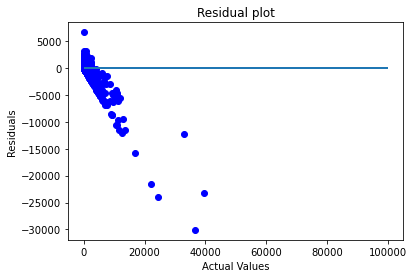

In [106]:
rf.fit(X,y)
df['Random Forest Prediction'] = rf.predict(X)
df = df.sort_values('engagement_share_count', ascending=False)

# Residual plot
plt.scatter(df['engagement_share_count'], df['Random Forest Prediction'] - df['engagement_share_count'], color = 'blue')
plt.hlines(y = 0, xmin = 0, xmax = 100000, linewidth = 2)
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.title('Residual plot')
plt.show()

c:\Users\Microsoft\anaconda3\envs\mlenv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Microsoft\anaconda3\envs\mlenv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution plot')

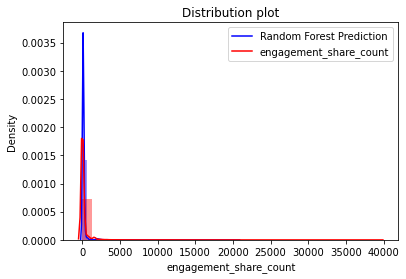

In [107]:
# Distribution plot
sns.distplot(df['Random Forest Prediction'], color = 'blue', bins = 30)
sns.distplot(df['engagement_share_count'], color = 'red', bins = 30)
plt.legend(labels=['Random Forest Prediction', 'engagement_share_count'])
plt.title('Distribution plot')

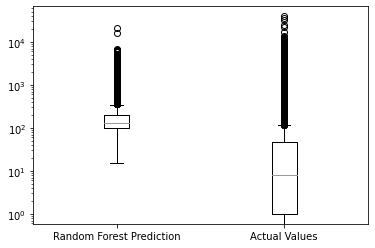

In [108]:
# Distribution plot (in boxplot)

plt.boxplot([df['Random Forest Prediction'], df['engagement_share_count']], labels=['Random Forest Prediction', 'Actual Values'])
# change the y-axis to log 10 scale
plt.yscale('log')

# Reviewing the interpretable models (regression)

Although Random Forest performs the best, it is not easy to interpret its results.
To understand what variables influence the number of share, I look at the coefficient of the variables of regression models.

The below is a table of coefficient of each variable of the regression models.

In [109]:
# Coefficient of Ridge Regression

linear.fit(X, y)
ridge.fit(X, y)
lasso.fit(X, y)

coefficient = pd.DataFrame()
coefficient['variables'] = ['top_article', 'hour_published_at', 't_angry', 't_fear', 't_happy', 't_sad', 't_surprise', 'd_angry', 'd_fear', 'd_happy', 'd_sad', 'd_surprise', 'followers in ten thousand', 'abc-news', 'al-jazeera-english', 'bbc-news',
       'business-insider', 'cbs-news', 'cnn', 'espn', 'newsweek', 'reuters',
       'the-irish-times', 'the-new-york-times', 'the-wall-street-journal', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
coefficient['regression_coefficient'] = linear.coef_
coefficient['ridge_coefficient'] = ridge.coef_
coefficient['lasso_coefficient'] = lasso.coef_

coefficient # Check the importance of each variable


,variables,regression_coefficient,ridge_coefficient,lasso_coefficient
0,top_article,1.696473e+02,167.460495,169.478178
1,hour_published_at,-5.108474e+01,-49.788353,-51.148209
2,t_angry,7.863685e+00,7.504636,7.750316
3,t_fear,2.024410e+01,19.909941,20.233097
4,t_happy,3.623351e+01,35.912695,36.386185
5,t_sad,2.072201e+01,20.353906,20.756828
6,t_surprise,1.393272e+01,13.530560,13.923250
7,d_angry,6.011340e+00,5.795839,6.129720
8,d_fear,2.373474e+01,23.289350,23.669635
9,d_happy,2.594999e+01,25.488178,26.024633


While the ridge regression and Lasso regression are quite similar in terms of the values of coefficient, the linear regression shows very different variables.


In the linear regression, the number of followers in ten thousand is the biggest driver on the number of share, which makes sense. On the other hand, the post by BBC news has the most negative impact on the number of shares.

In the ridge regression and the Lasso regression, being a top article on the homepage is the strongest driver of share and the number of followers does not affect the number of shares.

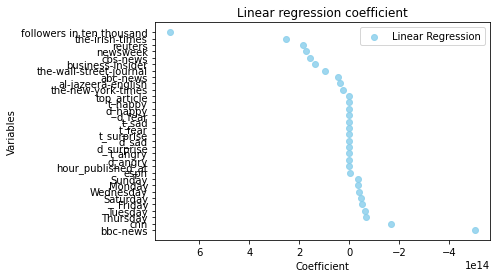

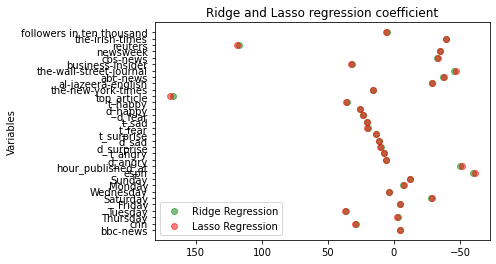

In [110]:
# Reorder a dataframe
ordered_coefficient = coefficient.sort_values(by='regression_coefficient', ascending=False)


# Create the first scatter plot
fig, ax = plt.subplots(1,1)
plt.scatter(ordered_coefficient['regression_coefficient'], ordered_coefficient['variables'], color='skyblue', alpha=0.8, label='Linear Regression')
plt.title('Linear regression coefficient')
plt.xlabel('Coefficient')
plt.ylabel('Variables')
plt.legend()

# Invert the x-axis and y-axis
ax.invert_xaxis()
ax.invert_yaxis()
plt.show()

# Create the second scatter plot (ridge and lasso)
fig, ax = plt.subplots(1,1)
plt.scatter(ordered_coefficient['ridge_coefficient'], ordered_coefficient['variables'], color='green', alpha=0.5, label='Ridge Regression')
plt.scatter(ordered_coefficient['lasso_coefficient'], ordered_coefficient['variables'], color='red', alpha=0.5, label='Lasso Regression')
plt.legend()
plt.title('Ridge and Lasso regression coefficient')
plt.ylabel('Variables')

# Invert the x-axis and y-axis
ax.invert_xaxis()
ax.invert_yaxis()
plt.show()

## Emotion-related coefficient

Regarding emotions of the news titles and description, all of the regression models show a similar tendency.
* First, all emotions have a positive impact on the number of shares.
* Second, the emotion that drives the number of shares the most is "happy" followed by the emotions of fear in the news descriptions and that of sad in the news titles.
* Third, the emotions of anger are the weakest drivers of shares.

In ridge and lasso regression models, happy emotions of title and description has more impact than the number of followers on the number of share.

This result is interesting and unexpected for me as I predicted anger to be a driver of number of share because it is a strong emotion and sometimes it causes people impulsive actions.

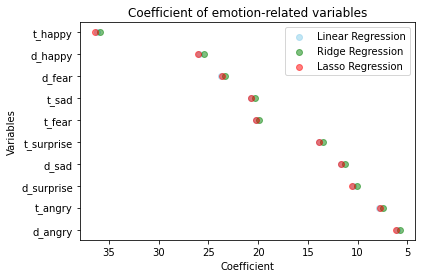

In [111]:
emotion_coefficient = coefficient[['variables', 'regression_coefficient', 'ridge_coefficient', 'lasso_coefficient']][2:12].sort_values(by='regression_coefficient', ascending=False)

# Create the first scatter plot
fig, ax = plt.subplots(1,1)
plt.scatter(emotion_coefficient['regression_coefficient'], emotion_coefficient['variables'], color='skyblue', alpha=0.5, label='Linear Regression')
plt.scatter(emotion_coefficient['ridge_coefficient'], emotion_coefficient['variables'], color='green', alpha=0.5, label='Ridge Regression')
plt.scatter(emotion_coefficient['lasso_coefficient'], emotion_coefficient['variables'], color='red', alpha=0.5, label='Lasso Regression')


plt.title('Coefficient of emotion-related variables')
plt.xlabel('Coefficient')
plt.ylabel('Variables')


# Invert the x-axis and y-axis
ax.invert_xaxis()
ax.invert_yaxis()
plt.legend()
plt.show()



## Time-related coefficients

In terms of the days when the posts are published, linear regression and other regression models show very different trends. In ridge and lasso regression, being posted on Saturday has the biggest negative impact on the number of share followed by Sunday. This may make sense because people tend to spend less time on social media reading the news because they are likely to be more active on weekends.
However, this is not consistent in linear regression; Monday and Sunday are the days with least negative impact on the number of share.

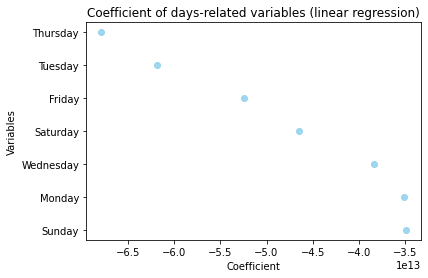

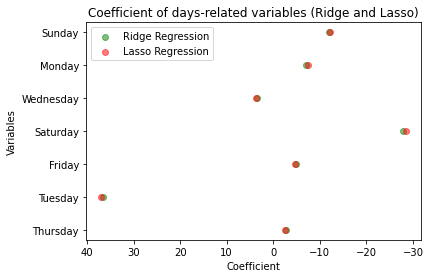

In [112]:
# Make a dataframe of day-related coefficients

days_coefficient = coefficient[['variables', 'regression_coefficient', 'ridge_coefficient', 'lasso_coefficient']][25:32].sort_values(by='regression_coefficient', ascending=False)

# Create the first scatter plot
fig, ax = plt.subplots(1,1)
plt.scatter(days_coefficient['regression_coefficient'], days_coefficient['variables'], color='skyblue', alpha=0.8, label='Linear Regression')

plt.title('Coefficient of days-related variables (linear regression)')
plt.xlabel('Coefficient')
plt.ylabel('Variables')

# Create the second scatter plot
fig, ax = plt.subplots(1,1)
plt.scatter(days_coefficient['ridge_coefficient'], days_coefficient['variables'], color='green', alpha=0.5, label='Ridge Regression')
plt.scatter(days_coefficient['lasso_coefficient'], days_coefficient['variables'], color='red', alpha=0.5, label='Lasso Regression')

plt.title('Coefficient of days-related variables (Ridge and Lasso)')
plt.xlabel('Coefficient')
plt.ylabel('Variables')
plt.legend()



# Invert the x-axis and y-axis
ax.invert_xaxis()
ax.invert_yaxis()
plt.show()


## Discussion
Again, the Random Forest model proved to be the best performer among the five models I tested, however, it still fell short in accurately predicting the number of shares, particularly when the actual number was higher. 
This discrepancy could be attributed to the model's failure to consider a crucial factor or factors that influence share counts. My intuition suggests that delving into text analysis might hold the key. While factors like the timing of the post, the day it was published, and the publisher all influence share counts, the content of the news itself holds the utmost significance for engagement. 
To leverage the text data, I decided to employ sentiment analysis, which yielded an intriguing discovery: positive news had the most substantial impact on share counts. However, news encompasses more than mere emotions. The limitation of sentiment analysis in this particular modeling approach lies in its categorization into only four emotions, with their combined index always equaling one. It fails to measure the overall emotional intensity of the text, instead focusing on how the text is distributed across these four emotions. 
To conduct more comprehensive analysis and research, I plan to explore deeper text analysis techniques, such as investigating whether specific words can generate greater engagement. For instance, words with strong connotations like "war" or "dead."



# Ethical concerns 

While I did not include it in the current model, I had considered using the country mentioned in the news as a predictor variable. However, if this variable were to significantly impact the target variable, ethical concerns would arise. News related to influential countries like the United States or China tends to generate higher public interest and engagement. If this pattern becomes evident in the data and news outlets become aware of it, they might prioritize regional news that drives engagement to increase revenue from views. This could diminish the importance of news from smaller countries. Another ethical concern would be if the sentiment of articles or titles were found to strongly influence engagement. While news media should convey facts accurately, there may be temptation to use more emotional or sensationalized headlines to boost engagement.

These concerns are not direct consequences of machine learning or data science, but rather depend on how news media ethically responds to the insights gained from analysis and modeling. If news media remains committed to conveying the truth without solely focusing on engagement, even if emotional news is found to enhance engagement, it wouldn't be problematic. However, given the current news media business model, where outlets rely heavily on advertising revenue, there is a possibility that media might prioritize actions aimed solely at maximizing engagement. Thus, it is essential to exercise caution and carefully interpret the results.